In [121]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [3]:
model = YOLO('yolo11n.pt')

In [4]:
image_path = 'data/SoccerNetGS/gamestate-2024/valid/SNGS-021/img1/000001.jpg'
results = model.predict(image_path)

image 1/1 C:\Users\kowal\PycharmProjects\inzynierka\data\SoccerNetGS\gamestate-2024\valid\SNGS-021\img1\000001.jpg: 384x640 14 persons, 55.1ms
Speed: 3.5ms preprocess, 55.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [151]:
frame = cv2.imread(image_path)

In [162]:
b_boxes = results[0].boxes.xyxy.tolist()

In [165]:
cv2.imshow('frame', frame[int(b_boxes[2][1]):int(b_boxes[2][3]), int(b_boxes[2][0]):int(b_boxes[2][2])])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [153]:
def get_players(frame: np.ndarray, boxes: list[np.ndarray]) -> list[np.ndarray]:
    players = []
    for bbox in boxes:
        player = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        players.append(player)
    return players

In [154]:
players = get_players(frame, results[0].boxes.xyxy.tolist())

In [168]:
players[2].shape

(85, 29, 3)

In [169]:
def get_kits(players: list[np.ndarray]) -> list[np.ndarray]:
    kits = []
    for player in players:
        kit = player[player.shape[0]//6:player.shape[0]//2, int(player.shape[1] * 0.25):int(player.shape[1] * 0.75)]
        kits.append(kit)
    return kits

In [170]:
kits = get_kits(players)

In [171]:
kits[2]

array([[[154,  48,  47],
        [164,  59,  56],
        [148,  69,  58],
        ...,
        [158,  67,  70],
        [156,  73,  71],
        [173,  96,  93]],

       [[155,  61,  55],
        [169,  71,  65],
        [156,  67,  57],
        ...,
        [191, 107, 102],
        [219, 162, 153],
        [209, 162, 154]],

       [[132,  51,  46],
        [134,  52,  47],
        [151,  68,  66],
        ...,
        [140,  81,  71],
        [207, 180, 166],
        [207, 188, 173]],

       ...,

       [[141, 108,  93],
        [144,  85,  75],
        [151,  74,  65],
        ...,
        [165,  70,  60],
        [169,  71,  65],
        [163,  66,  62]],

       [[141, 106,  92],
        [145,  84,  74],
        [151,  74,  65],
        ...,
        [164,  68,  62],
        [168,  71,  67],
        [164,  67,  64]],

       [[139, 104,  90],
        [143,  82,  72],
        [150,  72,  65],
        ...,
        [164,  70,  65],
        [167,  70,  67],
        [163,  65,  65]]

In [10]:
cv2.imshow('kit1', kits[0])

In [29]:
for i, kit in enumerate(kits):
    cv2.imwrite(f'kits/kit{i+1}.png', kits[i])

In [11]:
cv2.imwrite('kits/kit1.png', kits[0])
cv2.imshow('kits_0', kits[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [173]:
def get_mean_color(kits: np.ndarray) -> list[np.ndarray]:
    mean_colors: list[int] = []
    for kit in kits:
        im = Image.fromarray(kit)
        im = im.convert('P', colors=16)
        im = np.array(im)
        mean_color = np.mean(im, axis=(0, 1))
        # color_image = np.zeros((100, 100, 3), dtype=np.uint8)
        # color_image[:] = [int(mean_color[0]), int(mean_color[1]), int(mean_color[2])]
        mean_colors.append(mean_color)
    return mean_colors

In [174]:
means = get_mean_color(kits)
means

[np.float64(157.18970588235294),
 np.float64(166.31565656565655),
 np.float64(83.73469387755102),
 np.float64(93.05333333333333),
 np.float64(69.35666666666667),
 np.float64(168.9707792207792),
 np.float64(154.5408653846154),
 np.float64(93.57407407407408),
 np.float64(125.90378787878788),
 np.float64(84.4054054054054),
 np.float64(160.37767094017093),
 np.float64(82.46825396825396),
 np.float64(171.82403100775193),
 np.float64(99.98512585812357)]

In [30]:
def get_shirt_color(num: int) -> int:
    image = Image.open(f'kits/kit{num}.png')
    image = image.convert('P', palette=Image.ADAPTIVE, colors=2)
    img_colors = image.getcolors(maxcolors=2)
    print(img_colors)
    w, h = image.size
    points = [(0,0), (0, h-1), (w-1, 0), (w-1, h-1)]
    colors: list[tuple] = []
    for point in points:
        colors.append(image.getpixel(point))
    bg_color: int = max(set(colors), key=colors.count)
    shirt_index: int = 1 - bg_color
    for color in img_colors:
        if color[1] == shirt_index:
            return color[0]
    return -1

In [37]:
kits_n = len(kits)
shirt_color = []
for i in range(kits_n):
    shirt_color.append(get_shirt_color(i+1))

[(2264, 0), (1876, 1)]
[(924, 0), (696, 1)]
[(365, 0), (447, 1)]
[(1619, 0), (1981, 1)]
[(1204, 0), (1196, 1)]
[(920, 0), (886, 1)]
[(382, 0), (450, 1)]
[(1297, 0), (818, 1)]
[(1239, 0), (1401, 1)]
[(1057, 0), (867, 1)]
[(2118, 0), (1574, 1)]
[(492, 0), (516, 1)]
[(1538, 0), (999, 1)]
[(1090, 0), (658, 1)]


In [38]:
shirt_color

[2264, 924, 447, 1981, 1196, 920, 382, 818, 1239, 867, 2118, 516, 1538, 658]

In [119]:
y = shirt_color.copy()

In [123]:
true = [1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0]

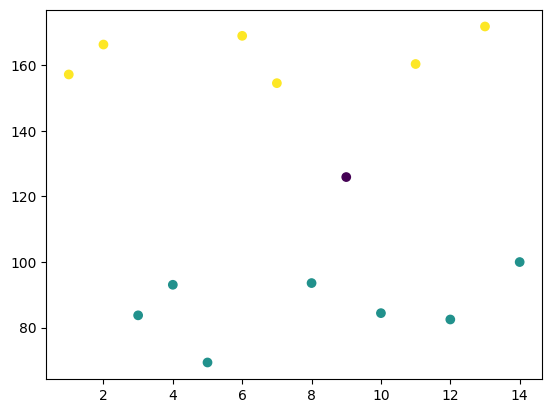

In [175]:
plt.scatter(range(1, len(means)+1), means, c=true)

In [129]:
img_rgb = Image.open('kits/kit7.png')
img_rgb = img_rgb.convert('P', palette=Image.ADAPTIVE, colors=2)
img_rgb